In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]=wb.DataReader(a, data_source = 'yahoo',start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-01-03,122.580002,3234.850098
2020-01-06,122.750000,3246.280029
2020-01-07,121.989998,3237.179932
2020-01-08,122.510002,3253.050049
2020-01-09,123.849998,3274.699951


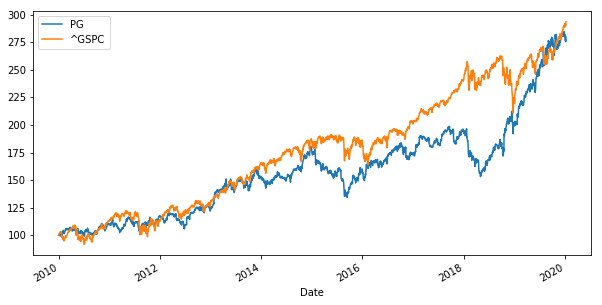

In [4]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [6]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [7]:
log_returns.mean()*250

PG       0.102005
^GSPC    0.106788
dtype: float64

In [8]:
log_returns.cov()*250

,PG,^GSPC
PG,0.021703,0.011281
^GSPC,0.011281,0.021687


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.519992
^GSPC,0.519992,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.82284511, 0.32284708])

In [14]:
arr[0]+arr[1]

1.1456921938976028

使权重和为1

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.2011579, 0.7988421])

w /= np.sum(weights)   w = w/sum(w)

In [17]:
weights[0]+weights[1]

0.9999999999999999

Expected Portfolio Return

In [18]:
np.sum(weights*log_returns.mean())*250

0.10582626451515655

Expected Portfolio Variance：

In [20]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.018343057334597578

Expected Portfolio Volatility:

In [22]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.1354365435715102

In [25]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250) #期望未来组合收益
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))) #组合波动
    
pfolio_returns,pfolio_volatilities

([0.10294821937676155,
  0.10320994800049646,
  0.10499262118395854,
  0.10274358962210815,
  0.10492814265431924,
  0.10487489126814142,
  0.10273007266092384,
  0.10474037791071425,
  0.1062700614856667,
  0.10470327789312822,
  0.10460027124942192,
  0.1025073591873285,
  0.10222262269092164,
  0.10382217112314045,
  0.10220788144673962,
  0.10471464853224914,
  0.10591547279121466,
  0.10364217105934703,
  0.10340921663175956,
  0.10203575684851098,
  0.10413130163401191,
  0.10398544881106106,
  0.10640204944951825,
  0.10510095604091844,
  0.10386417632980957,
  0.10552954362766605,
  0.10371385861952183,
  0.10594710783310989,
  0.10502398206035943,
  0.10337479791039439,
  0.10462123403756796,
  0.10602048603008822,
  0.10636601638957384,
  0.10387340446008507,
  0.10465259608458255,
  0.10368918804677722,
  0.10284823427665396,
  0.10551517484693572,
  0.1050227817932909,
  0.1034097906928091,
  0.10240663420836037,
  0.10480113039139032,
  0.10260269568699562,
  0.10466183002

In [27]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns,pfolio_volatilities

(array([0.10401829, 0.10497002, 0.10652832, 0.10591434, 0.10244036,
        0.10209539, 0.10388159, 0.10363747, 0.10467797, 0.10501881,
        0.10255968, 0.10492002, 0.10658639, 0.10419327, 0.10420867,
        0.10410656, 0.10354624, 0.10488168, 0.10518919, 0.10550855,
        0.1062885 , 0.1046533 , 0.10371694, 0.10435754, 0.10460343,
        0.10401245, 0.10441145, 0.10454993, 0.10417032, 0.10351604,
        0.10473841, 0.10203034, 0.1029905 , 0.10383387, 0.10325489,
        0.10435467, 0.10321272, 0.102432  , 0.10503398, 0.10480204,
        0.10435398, 0.1060107 , 0.10472078, 0.10483034, 0.10317472,
        0.1038855 , 0.10419613, 0.10263894, 0.10622418, 0.10407468,
        0.10457758, 0.10456776, 0.10211996, 0.10265359, 0.10569057,
        0.10407792, 0.10567916, 0.10403852, 0.1040748 , 0.10314078,
        0.10422179, 0.10438133, 0.10529674, 0.10436813, 0.10426669,
        0.10338327, 0.1058425 , 0.10483842, 0.10246907, 0.10588901,
        0.10409467, 0.10319243, 0.10475502, 0.10

In [29]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatilities})

In [30]:
portfolios.head()

,Return,Volatility
0,0.104018,0.128917
1,0.104970,0.129557
2,0.106528,0.143584
3,0.105914,0.136305
4,0.102440,0.141346


In [31]:
portfolios.tail()

,Return,Volatility
995,0.104948,0.129472
996,0.105931,0.136478
997,0.103586,0.130727
998,0.105350,0.131572
999,0.104109,0.128702


Text(0,0.5,'Expected Return')

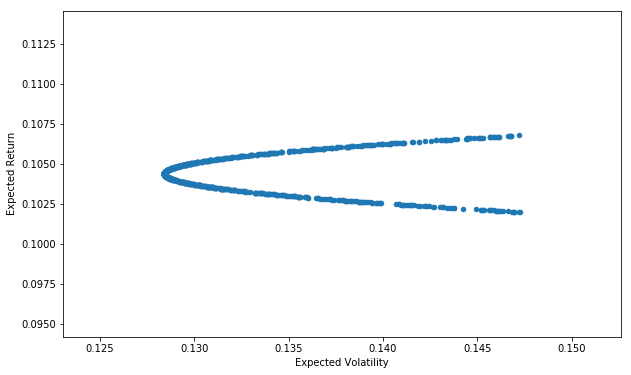

In [35]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')